# Töltsünk be, streameljünk és mintavételezzünk adatokat

## Töltsünk be kis mennyiségű adatot a memóriába

In [1]:
with open("Színek.txt", 'r') as megnyitott_fájl:
    print('A Színek.txt tartalma:\n' + megnyitott_fájl.read())

A Színek.txt tartalma:
Szín	Érték
Piros	1
Narancs	2
Sárga	3
Zöld	4
Kék	5
Lila	6
Fekete	7
Fehér	8


## Streameljünk nagy mennyiségű adatot a memóriába

In [2]:
with open("Színek.txt", 'r') as megnyitott_fájl:
    for megfigyelés in megnyitott_fájl:
        print('Adatok beolvasása: ' + megfigyelés, end="")

Adatok beolvasása: Szín	Érték
Adatok beolvasása: Piros	1
Adatok beolvasása: Narancs	2
Adatok beolvasása: Sárga	3
Adatok beolvasása: Zöld	4
Adatok beolvasása: Kék	5
Adatok beolvasása: Lila	6
Adatok beolvasása: Fekete	7
Adatok beolvasása: Fehér	8

## Kérjünk le képadatokat

(100, 100, 3)
30000


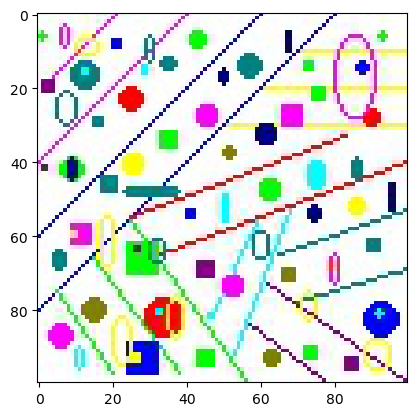

In [3]:
import matplotlib.pyplot as dg
import matplotlib.image as kp
%matplotlib inline

kép = kp.imread("Színdiagram.jpg")
print(kép.shape)
print(kép.size)
dg.imshow(kép)
dg.show()

## Mintavételezzünk adatokat különböző módszerekkel

In [4]:
n = 2
with open("Színek.txt", 'r') as megnyitott_fájl:
    for j, megfigyelés in enumerate(megnyitott_fájl):
        if j % n==0:
            print('Sor beolvasása: ' + str(j) +
            ' Tartalom: ' + megfigyelés, end="")

Sor beolvasása: 0 Tartalom: Szín	Érték
Sor beolvasása: 2 Tartalom: Narancs	2
Sor beolvasása: 4 Tartalom: Zöld	4
Sor beolvasása: 6 Tartalom: Lila	6
Sor beolvasása: 8 Tartalom: Fehér	8

Ez az eredmény `n=3` esetén:

In [5]:
n = 3
with open("Színek.txt", 'r') as megnyitott_fájl:
    for j, megfigyelés in enumerate(megnyitott_fájl):
        if j % n==0:
            print('Sor beolvasása: ' + str(j) +
            ' Tartalom: ' + megfigyelés, end="")

Sor beolvasása: 0 Tartalom: Szín	Érték
Sor beolvasása: 3 Tartalom: Sárga	3
Sor beolvasása: 6 Tartalom: Lila	6


In [6]:
from random import random
mintaméret = 0.25
with open("Színek.txt", 'r') as megnyitott_fájl:
    for j, megfigyelés in enumerate(megnyitott_fájl):
        if random()<=mintaméret:
            print('Sor beolvasása: ' + str(j) +
            ' Tartalom: ' + megfigyelés, end="")

Sor beolvasása: 7 Tartalom: Fekete	7


# Férjünk hozzá strukturált listafájlok formájában tárolt adatokhoz

## Olvassunk be szövegfájlból

In [7]:
import pandas as pd
színtábla = pd.io.parsers.read_table("Színek_UTF8.txt")
print(színtábla)

      Szín  Érték
0    Piros      1
1  Narancs      2
2    Sárga      3
3     Zöld      4
4      Kék      5
5     Lila      6
6   Fekete      7
7    Fehér      8


## Olvassunk be CSV tagolt formátumból

In [8]:
import pandas as pd
titanic = pd.io.parsers.read_csv("Titanic.csv")
X = titanic[['kor']]
print(X)

            kor
0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
...         ...
1304    14.5000
1305  9999.0000
1306    26.5000
1307    27.0000
1308    29.0000

[1309 rows x 1 columns]


In [9]:
X = titanic[['kor']].values
print(X)

[[29.        ]
 [ 0.91670001]
 [ 2.        ]
 ...
 [26.5       ]
 [27.        ]
 [29.        ]]


## Olvassunk be Excel- és más Microsoft Office-fájlokat

In [10]:
# HA hibát kapsz, amikor az alábbi kódot futtatod,
# használd ezt a cellát a szükséges támogatás telepítéséhez.
!pip install xlrd

In [11]:
import pandas as pd
xls = pd.ExcelFile("Értékek.xls")
trig_értékek = xls.parse('Munka1', index_col=None,
                        na_values=['NA'])
print(trig_értékek)

    Szög (fok)   Szinusz  Koszinusz   Tangens
0   127.947847  0.788571  -0.614944 -1.282346
1   225.584618 -0.714285  -0.699855  1.020618
2   167.879785  0.209964  -0.977709 -0.214750
3    55.471385  0.823843   0.566818  1.453453
4   129.330880  0.773499  -0.633798 -1.220419
..         ...       ...        ...       ...
67  319.370717 -0.651162   0.758939 -0.857991
68  260.987686 -0.987655  -0.156647  6.304981
69  312.185748 -0.740972   0.671536 -1.103398
70  120.708324  0.859778  -0.510668 -1.683635
71  238.721739 -0.854656  -0.519195  1.646118

[72 rows x 4 columns]


# Küldjünk adatokat strukturálatlan fájlok formájában

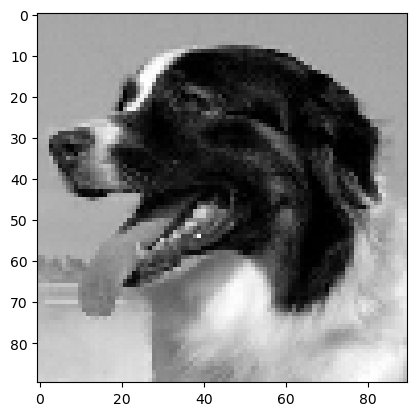

In [12]:
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as dg
import matplotlib.cm as cm

példafájl = ("https://upload.wikimedia.org/" + "wikipedia/commons/7/7d/Dog_face.png")
kép = imread(példafájl, as_gray=True)
dg.imshow(kép, cmap=cm.gray)
dg.show()

In [13]:
print("adattípus: %s, forma: %s" % (type(kép), kép.shape))

adattípus: <class 'numpy.ndarray'>, forma: (90, 90)


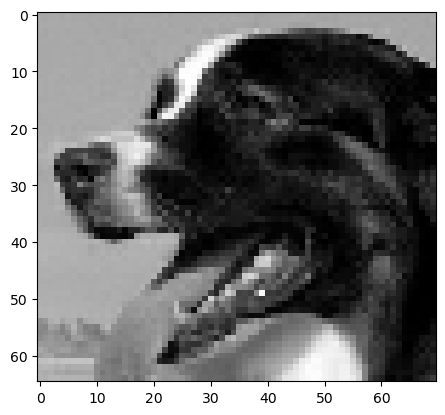

In [14]:
kép2 = kép[5:70,0:70]
dg.imshow(kép2, cmap=cm.gray)
dg.show()

adattípus: <class 'numpy.ndarray'>, forma: (30, 30)


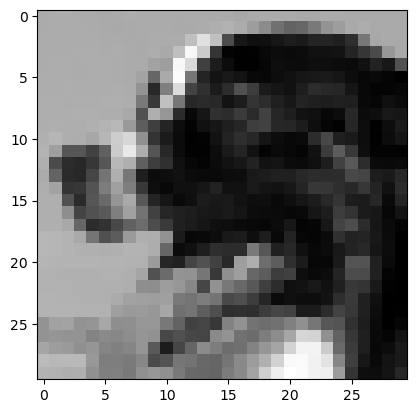

In [15]:
kép3 = resize(kép2, (30, 30), mode='symmetric')
dg.imshow(kép3, cmap=cm.gray)
print("adattípus: %s, forma: %s" % (type(kép3), kép3.shape))

In [16]:
képsor = kép3.flatten()
print("adattípus: %s, forma: %s" % (type(képsor), képsor.shape))

adattípus: <class 'numpy.ndarray'>, forma: (900,)


# Kezeljünk relációs adatbázisokból származó adatokat

In [17]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')

# Férjünk hozzá adatokhoz a weben

In [18]:
from lxml import objectify
import pandas as pd

xml = objectify.parse(open('XMLAdatok.xml'))
gyökér = xml.getroot()

ak = pd.DataFrame(columns=('Szám', 'Sztring', 'Logikai'))

for i in range(0,4):
    obj = gyökér.getchildren()[i].getchildren()
    sor = dict(zip(['Szám', 'Sztring', 'Logikai'],
                   [obj[0].text, obj[1].text,
                    obj[2].text]))
    sor_s = pd.Series(sor)
    sor_s.name = i
    sor_s = sor_s.to_frame().transpose()
    ak = pd.concat([ak, sor_s])

print(ak)

  Szám   Sztring Logikai
0    1      Első    Igaz
1    2   Második   Hamis
2    3  Harmadik    Igaz
3    4  Negyedik   Hamis
